In [17]:
import duckdb
import matplotlib as plt
import pandas as pd

<Axes: xlabel='year'>

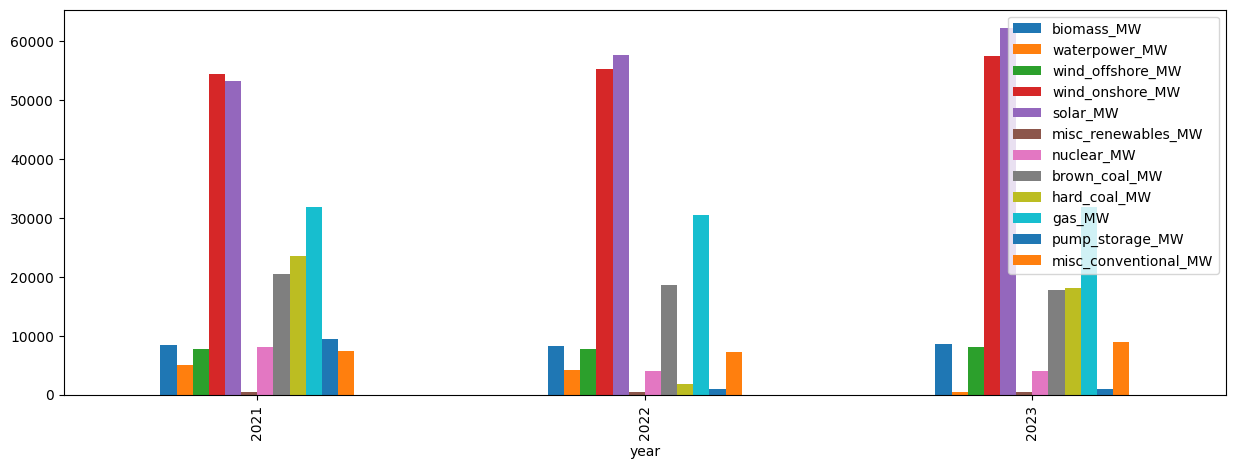

In [2]:
con = duckdb.connect("/workspaces/gerlectricity/gerlectricity.db")
df = con.sql("select *, year(start_date) as year from installed_generation_capacity").df()
df.plot.bar(x='year', y=['biomass_MW', 'waterpower_MW', 'wind_offshore_MW', "wind_onshore_MW", "solar_MW", "misc_renewables_MW", "nuclear_MW", "brown_coal_MW", "hard_coal_MW", "gas_MW", "pump_storage_MW", "misc_conventional_MW"], figsize=(15, 5))


In [27]:
df = con.sql("select * from installed_generation_capacity_growth").df()
# unpivot dataframe
df_melt = pd.melt(df, id_vars=['year'], var_name='energy_source', value_name='growth_rate')
# pivot dataframe
df_pivot = pd.pivot_table(df_melt, values='growth_rate', index='energy_source', columns='year')
df_pivot.reset_index()

year,energy_source,2022,2023
0,biomass_MW_growth_rate,-0.833135,2.460394
1,brown_coal_MW_growth_rate,-9.484063,-4.594478
2,gas_MW_growth_rate,-4.348507,4.369456
3,hard_coal_MW_growth_rate,-91.986893,862.665959
4,misc_conventional_MW_growth_rate,-2.934477,23.660961
5,misc_renewables_MW_growth_rate,-13.146552,3.225806
6,nuclear_MW_growth_rate,-50.012324,0.000000
7,pump_storage_MW_growth_rate,-90.150711,0.000000
8,solar_MW_growth_rate,8.333646,7.853630
9,waterpower_MW_growth_rate,-16.803599,-87.890901


In [29]:
df = con.sql("select * from installed_generation_capacity").df()
df.head()

,start_date,end_date,biomass_MW,waterpower_MW,wind_offshore_MW,wind_onshore_MW,solar_MW,misc_renewables_MW,nuclear_MW,brown_coal_MW,hard_coal_MW,gas_MW,pump_storage_MW,misc_conventional_MW
0,2021-01-01,2021-01-01,8402.0,5112.0,7774.0,54499.0,53302.0,464.0,8114.0,20487.0,23499.0,31942.0,9422.0,7463.0
1,2022-01-01,2022-01-01,8332.0,4253.0,7787.0,55289.0,57744.0,403.0,4056.0,18544.0,1883.0,30553.0,928.0,7244.0
2,2023-01-01,2023-01-01,8537.0,515.0,8129.0,57448.0,62279.0,416.0,4056.0,17692.0,18127.0,31888.0,928.0,8958.0
